## Face and Eye Detection by using Haar Cascades

In [12]:
#Import the libraries that will be used
import numpy as np
import cv2

#Load the required XML classifiers
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

#Read image
img = cv2.imread('image.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [13]:
#Find the faces in the image
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

#Create a ROI for the face and apply eye detection
for (x, y, w, h) in faces:
    img = cv2.rectangle(img, (x, y),(x + w, y + h),(255, 0, 0), 2)
    roi_gray = gray[y:y + h, x:x + w]
    roi_color = img[y:y + h, x:x + w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey),(ex + ew, ey + eh),(0, 255, 0), 2)

In [14]:
#Show the image
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Number Recognition by using CNN

In [30]:
#Import the libraries and dataset that will be used
import tensorflow as tf
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [23]:
#Convert the 3-dimension numpy array into 4-dimensional
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [24]:
#Set the type as float to have floating values after the division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [25]:
#Normalize data
x_train /= 255
x_test /= 255

In [26]:
#Create and compile the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(28, kernel_size = (3, 3), input_shape = input_shape),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax'), 
])

model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

In [27]:
#Train the model
model.fit(x = x_train, 
          y = y_train, 
          epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2071 - accuracy: 0.9383
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0845 - accuracy: 0.9737
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0602 - accuracy: 0.9814
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0447 - accuracy: 0.9855
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0356 - accuracy: 0.9883
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0319 - accuracy: 0.9898
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0256 - accuracy: 0.9912 2s - - ETA: 1s - loss: 0.0253 - accu - ETA: 0s - los
Epoch 8/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0223 - accuracy: 0.9923
Epoch 9/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0211 - accuracy: 0.9924
Epoch 10/10
1875/18

In [28]:
#Evaluate the model
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0648 - accuracy: 0.9851


[0.0648496150970459, 0.9850999712944031]

7


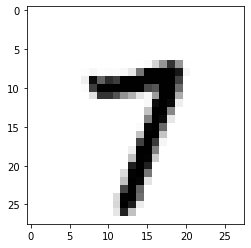

In [33]:
#Predict a number
image_index = 1710
plt.imshow(x_test[image_index].reshape(28, 28), cmap = 'Greys')
predict = x_test[image_index].reshape(28, 28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

3


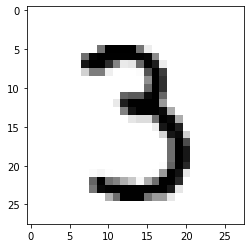

In [35]:
#Predict a number
image_index = 2128
plt.imshow(x_test[image_index].reshape(28, 28), cmap = 'Greys')
predict = x_test[image_index].reshape(28, 28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

4


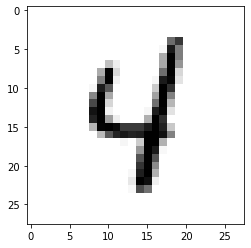

In [36]:
#Predict a number
image_index = 3366
plt.imshow(x_test[image_index].reshape(28, 28), cmap = 'Greys')
predict = x_test[image_index].reshape(28, 28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())